<div class="markdown-google-sans">

# <strong>Introduction</strong>
</div>

As the team of <strong>Number Ninjas</strong>, we have decided to participate in a challenging data science competition, which is performing by Metu Stats Club. This competition, also known as a Datathon, is not only an opportunity for us to improve ourselves in the data science field but also a chance to meet the professionals in this field to get, thank you in advance <strong>Metu Statistics and Data Science Club</strong> for this organization.

##<strong>Team</strong>
We are Number Ninjas - a team of three highly motivated and skilled individuals eager to take part in this datathon. Our team consists of three students from Middle East Technical University (METU), one from the Statistics department in their 3rd year and the other from the Mathematics department in their 4th year. Together with our combined knowledge and expertise in statistics and mathematics, we are confident in our ability to analyze and make sense of complex datasets. We are excited to participate in this datathon and are committed to delivering top-quality results.

##<strong>Members</strong>


*   Ali Valiyev
*   Ahmet Alpay Çetin
*   Hüseyin Eren Demirtaş



## <strong>Colab</strong>
For this competition, we will be using <strong>Google Colab</strong>, a powerful online platform that allows us to write and execute Python code, collaborate with our team members, and share our work with you. It's an excellent tool for working with data and implementing various data science techniques.

<div class="markdown-google-sans">

# <strong>Pre Selection Task</strong>
</div>

For the pre selection task, we are given three main tasks;


1.   You are given an 18-month transactional data set. Please split this data set into two 9-month periods.

2.   Create churn variable from dataset. You are supposed to use the first 9-month duration to construct your model. For example, you should use the first 6-month duration for the active users and use the last 3-month period to determine if these active users churn within this 3-month period. (Please resolve if there is imbalance in response before modeling.)

3.	Once you learn from the first 9-month period, proceed with the second 9-month data. Use your churn model obtained in (2) to predict if active customers (for example, those who were active in the first 6-month period of the second data set) churn in the last 3 months of this duration.


<div class="markdown-google-sans">

# <strong>Methodolgy</strong>
</div>

Our main methodology to complete the given task involves importing the data, splitting it into two periods, creating a churn variable, exploring and preprocessing the data, building and evaluating the churn model, and using the model to predict churn in the second 9-month period. Step by step it will be given as follows,

* Firstly, we shall import the dataset into Google Colab and split it into two 9-month periods based on the date range.

* Then, since our main aim will be to create a churn variable using the first 9-month period of the dataset, we will use Python libraries such as Pandas and Numpy to perform data manipulation and create the churn variable.

* For this purpose, first, we will explore the data using visualizations and descriptive statistics to gain insights into the customer behavior and identify any patterns or trends that could be relevant for modeling.

* If it is necessary, we will preprocess the data by handling missing values, outliers, and encoding categorical variables. We can use techniques such as imputation, scaling, and one-hot encoding to prepare the data for modeling.

* Then, we will be ready to build a churn model using the first 9-month period of the dataset. Here, we will most probably use machine learning algorithms such as logistic regression, decision trees, or random forests to build the model. For this purpose, we will also use libraries such as Scikit-learn to build and evaluate the model.

* Finally, we shall evaluate the performance of the model using metrics such as accuracy, precision, recall, and F1-score. There are few techniques that we can use here, such as cross-validation and hyperparameter tuning to optimize the model's performance.

* To complete the task, we are going to use the churn model obtained in step 5 to predict if active customers in the first 6-month period of the second 9-month period will churn in the last 3 months of the second 9-month period.

<div class="markdown-google-sans">

# <strong>Import Data</strong>

</div>

In order to import the provided data set into our colab environment, we will first save the data into <strong>Google Drive</strong>, and then from there import it here. Because saving the provided dataset into Google Drive and then importing it into colab has several advantages, for instance

* It ensures that the data is securely stored and easily accessible.

* It allows multiple team members to access and work on the same dataset simultaneously.

* It reduces the time and effort required to upload the data into Google Colab each time you want to work on the dataset.

Then by using <strong>pandas</strong> library, we will read the data and save it into suitable varaibles.

## <strong>Download</strong>
For this purpose, first we will share the data in the drive, that everyone has access. Then by using main link id of the file to share, we will import the data as follows,

In [ ]:
! gdown 1U4XJ_FuVazEX47TVk1Jv0DF7WD2k5kYz

Downloading...
From: https://drive.google.com/uc?id=1U4XJ_FuVazEX47TVk1Jv0DF7WD2k5kYz
To: /content/Data23.xlsx
100% 4.70M/4.70M [00:00<00:00, 146MB/s]


## <strong>Load</strong>
Now, let us read the provided data. Since it has 3 seperates sheets, we will define 3 different varaible for each of them. To read them we will use from "pandas" library the "read_excel" function.

In [ ]:
import pandas as pd

file_name = "Data23.xlsx"
sales_sheet = "SALES"
products_sheet = "PRODUCTS"
customers_sheet = "CUSTOMERS"
sales_df = pd.read_excel(io=file_name, sheet_name=sales_sheet)
products_df = pd.read_excel(io=file_name, sheet_name=products_sheet)
customers_df = pd.read_excel(io=file_name, sheet_name=customers_sheet)

<div class="markdown-google-sans">

# <strong>Create Churn Variable</strong>

</div>
In order to create the churn variable, we need to first split the dataset into two 9-month periods as instructed. Then, we need to use the first 6-month duration to construct the model and create the churn variable based on the last 3 months of the first duration.

## <strong>Split</strong>
For this purpose, first we will split the dataset into two 9-month periods. So that we can use the first 9-month of records as the training data for our model. Then, as the task 3 provided us to do so, we can use second 9-month record to train our model. Hence, let us use the "datetime" module to create a index list to filter the data based on the transaction date. Filtering process will be given as

* Period 1 will include all rows with a 'DateTime' value in the range of January 1, 2017 (included) to October 1, 2017 (excluded).

* Period 2 will include all rows with a 'DateTime' value in the range of October 1, 2017 (included) to July 1, 2017 (excluded).

In [ ]:
from datetime import datetime
sales_df['DateTime'] = pd.to_datetime(sales_df['DateTime'])
first_9_month = (datetime(2017,1,1) <= sales_df['DateTime']) & (sales_df['DateTime'] < datetime(2017,10,1))
second_9_month = (datetime(2017,10,1) <= sales_df['DateTime']) & (sales_df['DateTime'] < datetime(2018,7,1))
sales_df_period_1 = sales_df.loc[first_9_month]
sales_df_period_2 = sales_df.loc[second_9_month]

After spliting the data set, we will work on with first period only while training the model. Now, we will indicate each user who has sales record in first 6-month period of the splited data as active user or in-active user based on their sales record in the last 3-month of the period in the splited data. To do so, we will apply simple iteration on users data frame, then by checking the condition we will assign 0 or 1, which will indicate active or inactive user respectivley. However, if the user does not have any records in the first 6-month period, then we will just pass the user, and at the end we will drop all such users, becasue they will be belong the other data set.

* 6-month period will include all rows with a 'DateTime' value less than the July 1, 2017 (excluded).

* 3-month period will include all rows with a 'DateTime' value greather than the July 1, 2017 (included).

In [ ]:
index_6_month_first_period = (sales_df_period_1['DateTime'] < datetime(2017,7,1))
index_3_month_first_period = (datetime(2017,7,1) <= sales_df_period_1['DateTime'])
sales_df_first_6_month_first_period = sales_df_period_1[index_6_month_first_period]
sales_df_last_3_month_first_period = sales_df_period_1[index_3_month_first_period]

##<strong>Assign Churn Variable</strong>
Now, we shall determine all the users who have sales record in the first 6-month period in the data. These users will be the ones that we will assign a churn variable. Then, to determine each of the churn variables, we will simply check whether they are in the last 3-month period in the sales record. If they do so, we will assign them 0, because that will mean that, they are still active users, otherwise, we will simply assign 1, meaning they became inactive users. We will define a new data frame called "customers_df_churn", which will store all 6-month users' data, with their churn variable.

In [ ]:
users_first_period = sales_df_first_6_month_first_period["UserID"].unique()
active_users_first_period = sales_df_last_3_month_first_period["UserID"].unique()
customers_df_churn_first_period = customers_df.loc[(customers_df["UserID"].isin(users_first_period))].copy()
customers_df_churn_first_period["Churn"] = 1
customers_df_churn_first_period.loc[(customers_df_churn_first_period["UserID"].isin(active_users_first_period)), "Churn"] = 0

Finally, let us merge the newly created data frame "customers_df_churn" with the sales table, so that we can use the provided data on the traning. Notice that, with this way we will be only using the sales records, who are occured during only the first 6-month period, last 3-month

In [ ]:
merged_df_train = pd.merge(sales_df_first_6_month_first_period, customers_df_churn_first_period, on='UserID', how="right")
merged_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18302 entries, 0 to 18301
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TransactionID         18302 non-null  int64         
 1   UserID                18302 non-null  int64         
 2   DateTime              18302 non-null  datetime64[ns]
 3   ProductID             18302 non-null  int64         
 4   Channel               18302 non-null  object        
 5   PaymentType           18302 non-null  object        
 6   Price                 18302 non-null  float64       
 7   Discount              18302 non-null  object        
 8   UserFirstTransaction  18302 non-null  datetime64[ns]
 9   Gender                18302 non-null  object        
 10  Location              18302 non-null  object        
 11  Age                   18302 non-null  int64         
 12  Churn                 18302 non-null  int64         
dtypes: datetime64[ns

<div class="markdown-google-sans">

# <strong>Preprocessing</strong>

</div>

First, we are converting the column "ProductID" and "Churn" to a categorical data type using the astype() method. This is a useful optimization when dealing with columns that have a limited number of possible values, as it can save memory and improve performance.

Next, we are selecting a subset of columns from the dataframe and assigning them back to merged_df. Specifically, the selected columns are "ProductID", "Channel", "PaymentType", "Price", "Discount", "Gender", "Location", "Age", and "Churn". This can be done using bracket indexing with a list of column names.

In [ ]:
merged_df_train["ProductID"] = merged_df_train["ProductID"].astype("category")
merged_df_train["Churn"] = merged_df_train["Churn"].astype("category")
merged_df_train = merged_df_train[["ProductID", "Channel", "PaymentType", "Price", "Discount", "Gender", "Location", "Age", "Churn"]]

In the code below, we are  importing necessary libraries for both basic data manipulation and machine learning.

In [ ]:
## Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ML
# sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix

## Algorithms
# sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

After importing the necessary libraries, we are splitting the merged_df data into training and testing sets using train_test_split() method. It then separates the target variable ('Churn') from the training set (X_train).

In [ ]:
# Construct train, test data.
train, test = train_test_split(merged_df_train, test_size=0.30, random_state=42)
X_train = train.drop(columns='Churn', axis=1)
y_train = train['Churn']
X_test = test.drop(columns='Churn', axis=1)
y_test = test['Churn']

The code below is preparing for feature preprocessing, by selecting numeric and categorical features, creating preprocessing pipelines for each data type, and then putting the pipelines together into a ColumnTransformer object. It also defines SMOTE object from imblearn library for oversampling the minority class to address the issue of class imbalance.

In [ ]:
## Selecting categorical and numeric features
numerical_ix = X_train.select_dtypes(include=np.number).columns
categorical_ix = X_train.select_dtypes(exclude=np.number).columns
## Create preprocessing pipelines for each datatype
numerical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='median')),
('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
('scaler', StandardScaler())])
## Putting the preprocessing steps together
preprocessor = ColumnTransformer([
('numerical', numerical_transformer, numerical_ix),
('categorical', categorical_transformer, categorical_ix)],
remainder='passthrough')
smote = SMOTE(random_state=42, sampling_strategy=1.0)

##Plots
Before going into details of preprocessing, we would like to provide some charts related to our training data merged_df, which corresponds to churned sales data with the first 6-month period. Indeed, the charts will be quite useful to understand the distribution of the data features and relations with the churn variables.

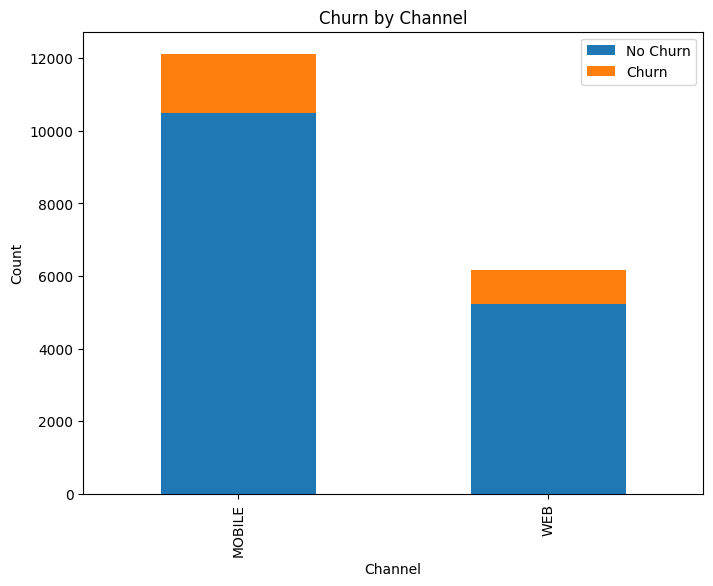

In [ ]:
# Group the data by Channel and Churn and count the number of occurrences
grouped = merged_df_train.groupby(['Channel', 'Churn']).size().unstack()

# Create a bar chart using the grouped data
ax = grouped.plot(kind='bar', stacked=True, figsize=(8, 6))

# Set the title and axis labels
ax.set_title('Churn by Channel')
ax.set_xlabel('Channel')
ax.set_ylabel('Count')

# Add a legend
ax.legend(['No Churn', 'Churn'], loc='upper right')

# Show the plot
plt.show()

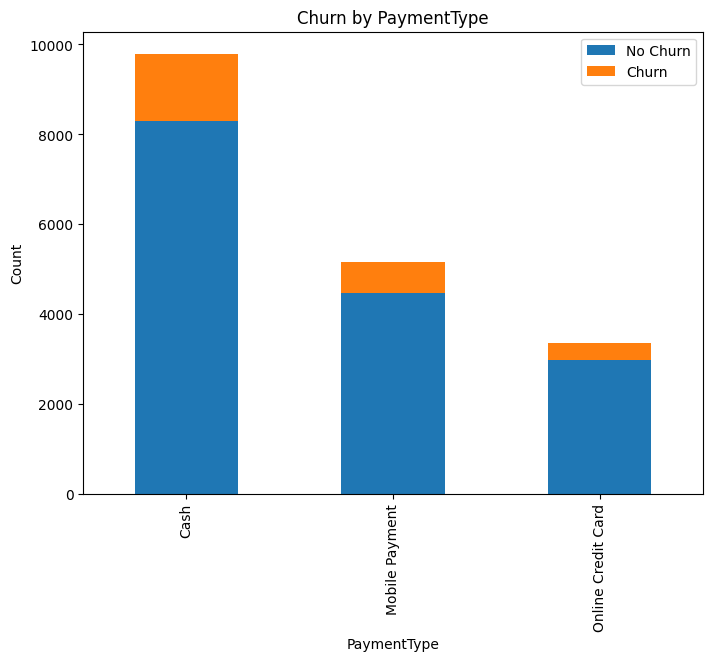

In [ ]:
# Group the data by Channel and Churn and count the number of occurrences
grouped = merged_df_train.groupby(['PaymentType', 'Churn']).size().unstack()

# Create a bar chart using the grouped data
ax = grouped.plot(kind='bar', stacked=True, figsize=(8, 6))

# Set the title and axis labels
ax.set_title('Churn by PaymentType')
ax.set_xlabel('PaymentType')
ax.set_ylabel('Count')

# Add a legend
ax.legend(['No Churn', 'Churn'], loc='upper right')

# Show the plot
plt.show()

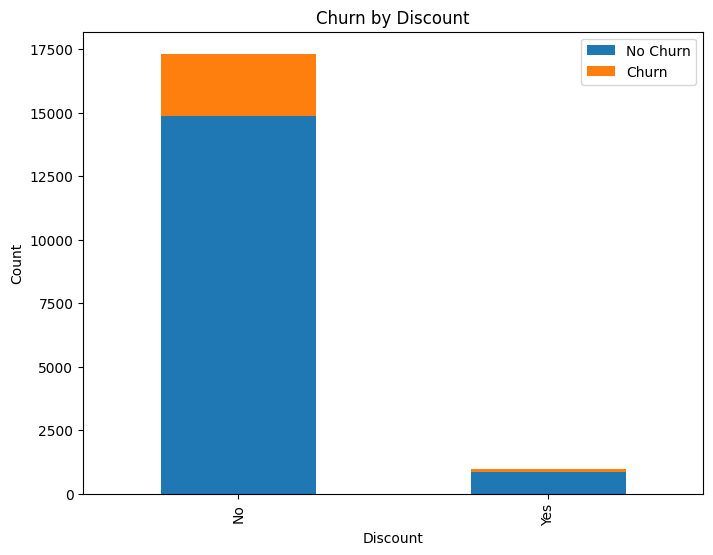

In [ ]:
# Group the data by Channel and Churn and count the number of occurrences
grouped = merged_df_train.groupby(['Discount', 'Churn']).size().unstack()

# Create a bar chart using the grouped data
ax = grouped.plot(kind='bar', stacked=True, figsize=(8, 6))

# Set the title and axis labels
ax.set_title('Churn by Discount')
ax.set_xlabel('Discount')
ax.set_ylabel('Count')

# Add a legend
ax.legend(['No Churn', 'Churn'], loc='upper right')

# Show the plot
plt.show()

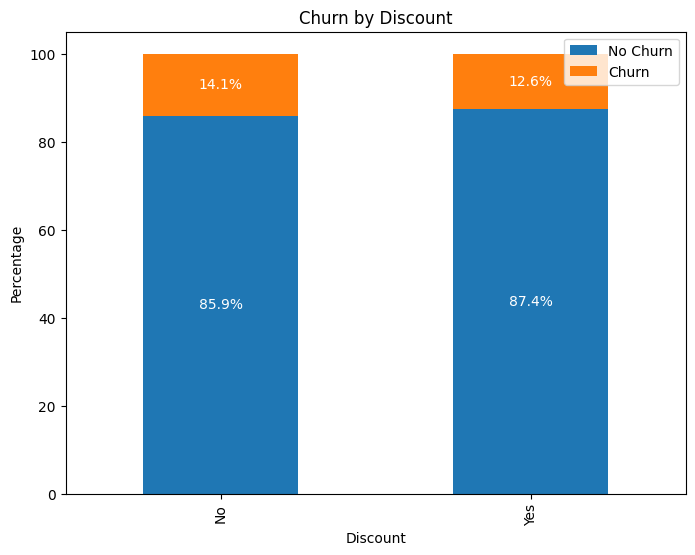

In [ ]:
# Group the data by Channel and Churn and count the number of occurrences
grouped = merged_df_train.groupby(['Discount', 'Churn']).size().unstack()

# Calculate the percentages for each Churn category
grouped_perc = (grouped.T / grouped.sum(axis=1)).T * 100

# Create a stacked bar chart using the grouped data
ax = grouped_perc.plot(kind='bar', stacked=True, figsize=(8, 6))

# Set the title and axis labels
ax.set_title('Churn by Discount')
ax.set_xlabel('Discount')
ax.set_ylabel('Percentage')

# Add a legend
ax.legend(['No Churn', 'Churn'], loc='upper right')

for i, category in enumerate(grouped_perc.index):
    prev_total = 0
    for j, value in enumerate(grouped_perc.columns):
        ax.text(i, prev_total + (grouped_perc.iloc[i, j] / 2), f'{grouped_perc.iloc[i, j]:.1f}%',
                 ha='center', va='center', color='white')
        prev_total += grouped_perc.iloc[i, j]

# Show the plot
plt.show()

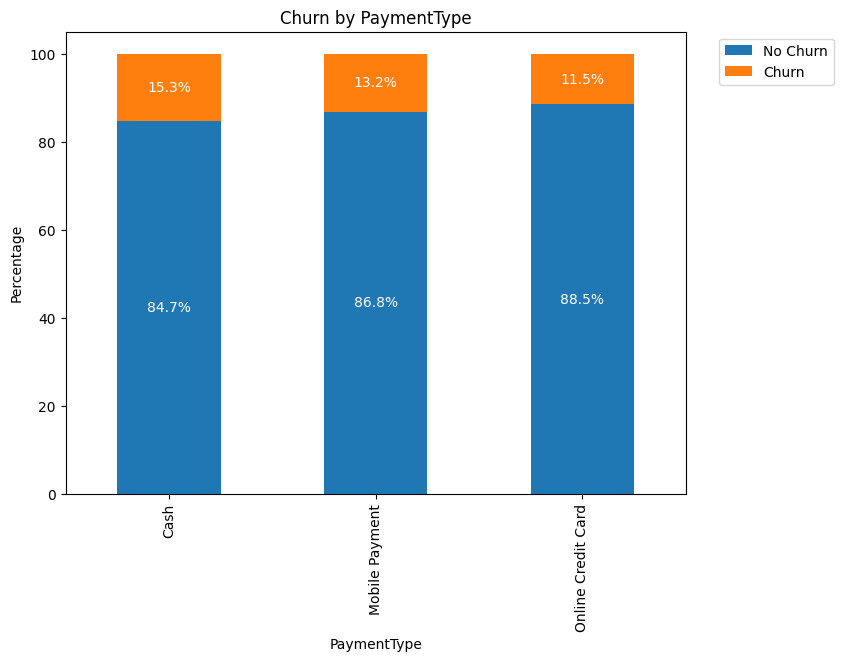

In [ ]:
# Group the data by Channel and Churn and count the number of occurrences
grouped = merged_df_train.groupby(['PaymentType', 'Churn']).size().unstack()

# Calculate the percentages for each Churn category
grouped_perc = (grouped.T / grouped.sum(axis=1)).T * 100

# Create a stacked bar chart using the grouped data
ax = grouped_perc.plot(kind='bar', stacked=True, figsize=(8, 6))

# Set the title and axis labels
ax.set_title('Churn by PaymentType')
ax.set_xlabel('PaymentType')
ax.set_ylabel('Percentage')

# Add a legend
ax.legend(['No Churn', 'Churn'], loc='upper right', bbox_to_anchor=(1.25, 1))

for i, category in enumerate(grouped_perc.index):
    prev_total = 0
    for j, value in enumerate(grouped_perc.columns):
        ax.text(i, prev_total + (grouped_perc.iloc[i, j] / 2), f'{grouped_perc.iloc[i, j]:.1f}%',
                 ha='center', va='center', color='white')
        prev_total += grouped_perc.iloc[i, j]

# Show the plot
plt.show()

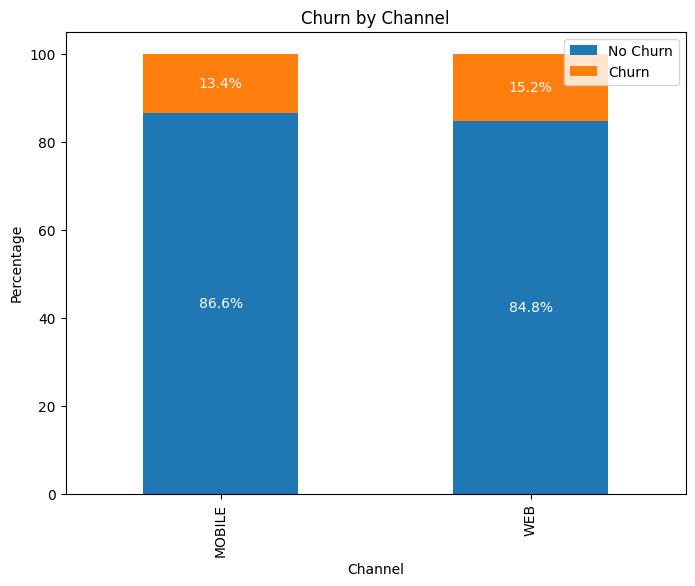

In [ ]:
# Group the data by Channel and Churn and count the number of occurrences
grouped = merged_df_train.groupby(['Channel', 'Churn']).size().unstack()

# Calculate the percentages for each Churn category
grouped_perc = (grouped.T / grouped.sum(axis=1)).T * 100

# Create a stacked bar chart using the grouped data
ax = grouped_perc.plot(kind='bar', stacked=True, figsize=(8, 6))

# Set the title and axis labels
ax.set_title('Churn by Channel')
ax.set_xlabel('Channel')
ax.set_ylabel('Percentage')

# Add a legend
ax.legend(['No Churn', 'Churn'], loc='upper right')

for i, category in enumerate(grouped_perc.index):
    prev_total = 0
    for j, value in enumerate(grouped_perc.columns):
        ax.text(i, prev_total + (grouped_perc.iloc[i, j] / 2), f'{grouped_perc.iloc[i, j]:.1f}%',
                 ha='center', va='center', color='white')
        prev_total += grouped_perc.iloc[i, j]

# Show the plot
plt.show()

<div class="markdown-google-sans">

# <strong>Model Training</strong>

</div>

In the code below we are creating a list of classifiers that will be tried out and evaluated for the given dataset. The code also defining a list to store the precision scores for each model.

The four classifiers that are included in the classifiers list are:

* KNeighborsClassifier()
* DecisionTreeClassifier()
* RandomForestClassifier()
* GradientBoostingClassifier()
The names of the classifiers are stored in the classifier_names list.

For each classifier, a pipeline is created with the following steps:

* preprocessor: applies the ColumnTransformer object defined earlier to preprocess the data
* smote: oversamples the minority class to address the issue of class imbalance
* selector: selects all features using SelectKBest method, which is equivalent to keeping all the features
* classifier: the specific classifier from the classifiers list that is being evaluated

The pipeline is then used to perform cross-validation with 10 folds using the cross_val_score() method from scikit-learn. The scoring parameter is set to "precision" to evaluate the performance of the classifiers based on their precision scores. The mean() method is called on the scores returned by cross_val_score() to calculate the average precision score across all folds.

The precision score for each classifier is printed to the console along with the name of the classifier. The precision score is also appended to the model_scores list.

In [ ]:
## Create list of classifiers we're going to try out
classifiers = [
  KNeighborsClassifier(),
  DecisionTreeClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  GradientBoostingClassifier(random_state=42)
]
classifier_names = [
  'KNeighborsClassifier()',
  'DecisionTreeClassifier()',
  'RandomForestClassifier()',
  'GradientBoostingClassifier()'
]
model_scores = []
## Looping through the classifiers
for classifier, name in zip(classifiers, classifier_names):
  pipe = Pipeline(steps=[
  ('preprocessor', preprocessor),
  ('smote', smote),
  ('selector', SelectKBest(k=len(X_train.columns))),
  ('classifier', classifier)])
  score = cross_val_score(pipe, X_train, y_train, cv=10, scoring="precision", error_score="raise").mean()
  print(f"{name} --> Precision: {score}")
  model_scores.append(score)

KNeighborsClassifier() --> Precision: 0.3849180417355899
DecisionTreeClassifier() --> Precision: 0.6000786389168062
RandomForestClassifier() --> Precision: 0.7782367075748748
GradientBoostingClassifier() --> Precision: 0.2993668273473252


The code below creates a pandas DataFrame called model_performance, which stores the names and precision scores of each classifier that was evaluated. The DataFrame has two columns: 'Classifier' and 'Precision'.

As we can see from the result, the Random Forest performs better than other algorithms. So, we are continue with this model.

In [ ]:
## Let us look at all Classifers and their Precisions.
model_performance = pd.DataFrame({
  'Classifier':
    classifier_names,
  'Precision':
    model_scores
}).sort_values('Precision', ascending = False, ignore_index=True)
display(model_performance)

,Classifier,Precision
0,RandomForestClassifier(),0.778237
1,DecisionTreeClassifier(),0.600079
2,KNeighborsClassifier(),0.384918
3,GradientBoostingClassifier(),0.299367


Overall, the code that is below fits a Random Forest Classifier to the training data, generates predictions on the same data, and evaluates the precision, accuracy, and confusion matrix of the model. However, it's important to note that evaluating the model on the same data used for training can be misleading and result in overfitting. It's recommended to evaluate the model's performance on a separate test set that was not used during training.

In [ ]:
## Construct main pipeline, for the model.
main_pipeline = Pipeline(steps=[
('preprocessor', preprocessor),
('smote', smote),
('selector', SelectKBest(k=len(X_train.columns))),
('classifier', RandomForestClassifier())])
## Train the min model.
model = main_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
## Let us look at accuracy of the model, according to its train data.
print('Precision:', precision_score(y_pred, y_test), '\nAccuracy:', accuracy_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:\n', conf_mat)

Precision: 0.6075129533678757 
Accuracy: 0.9209615734838827

Confusion Matrix:
 [[4588  131]
 [ 303  469]]


<div class="markdown-google-sans">

# <strong>Model Test</strong>

</div>

Finally, to complete the Task 3, we need to apply our model into the second part of 9-month period data. For this purpose we will simpliy apply the same procces in the first 9-month period of data to construct test data.

The code below first splits the sales data into the first six months and the last three months, identifying active users in the last three months. Then, a DataFrame of customer information is filtered to only include users in the first six months, and a new column is added to indicate whether each customer has churned or not. Finally, the sales data and customer data are merged, and the resulting DataFrame is preprocessed by converting the ProductID and Churn columns to categorical data types and selecting specific columns of interest.

In [ ]:
# Test Data 9-month period for 2nd part of the record data.

# Split data 6 and 3 month periods.
index_6_month_second_period = (sales_df_period_2['DateTime'] < datetime(2018,4,1))
index_3_month_second_period = (datetime(2018,4,1) <= sales_df_period_2['DateTime'])
sales_df_first_6_month_second_period = sales_df_period_2[index_6_month_second_period]
sales_df_last_3_month_second_period = sales_df_period_2[index_3_month_second_period]

# Determine the users.
users_second_period = sales_df_first_6_month_second_period["UserID"].unique()
active_users_second_period = sales_df_last_3_month_second_period["UserID"].unique()

# Assign churn variables for them.
customers_df_churn_second_period = customers_df.loc[(customers_df["UserID"].isin(users_second_period))].copy()
customers_df_churn_second_period["Churn"] = 1
customers_df_churn_second_period.loc[(customers_df_churn_second_period["UserID"].isin(active_users_second_period)), "Churn"] = 0

# Merge the data
merged_df_test= pd.merge(sales_df_first_6_month_second_period, customers_df_churn_second_period, on='UserID', how="right")

# Convert data types.
merged_df_test["ProductID"] = merged_df_test["ProductID"].astype("category")
merged_df_test["Churn"] = merged_df_test["Churn"].astype("category")
merged_df_test = merged_df_test[["ProductID", "Channel", "PaymentType", "Price", "Discount", "Gender", "Location", "Age", "Churn"]]

# Check everything work.
merged_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24210 entries, 0 to 24209
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ProductID    24210 non-null  category
 1   Channel      24210 non-null  object  
 2   PaymentType  24210 non-null  object  
 3   Price        24210 non-null  float64 
 4   Discount     24210 non-null  object  
 5   Gender       24210 non-null  object  
 6   Location     24210 non-null  object  
 7   Age          24210 non-null  int64   
 8   Churn        24210 non-null  category
dtypes: category(2), float64(1), int64(1), object(5)
memory usage: 1.6+ MB


In the code below we are  evaluating the performance of a machine learning model on a test dataset. The dataset has been split into two parts - features (X_test) and target (y_test). The model has already been trained on a separate training dataset.

The code then generates predictions (y_pred) and predicted probabilities (y_score) using the trained model on the test dataset.

The performance of the model on the test dataset is then evaluated using precision score, accuracy score, and a confusion matrix. The accuracy score is calculated using the predictions (y_pred) and actual target values (y_test), while the confusion matrix is generated using the actual target values (y_test) and the predictions (y_pred).

In [ ]:
## Separate features and target for the test data
X_test = merged_df_test.drop(columns='Churn', axis=1)
y_test = merged_df_test['Churn']
## Creating the predictions
y_pred = model.predict(X_test)
## Looking at the performance
print('Accuracy:', accuracy_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:\n', conf_mat)

Accuracy: 0.8431639818256919

Confusion Matrix:
 [[20147  1579]
 [ 2218   266]]
